In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline

In [7]:
df = pd.read_csv('./archive (3)/bigml_59c28831336c6604c800002a.csv') 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Clean the data

In [9]:
#drop irrelevant columns
df = df.drop(columns=['state', 'phone number', 'area code'])

In [ ]:
#turn the yes/no to 0's and 1's
df_encoded = pd.get_dummies(df, drop_first=True)

In [13]:
df_encoded.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,False,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,True,False


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

In [16]:
df_encoded.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0


In [17]:
df_encoded['churn'] = df_encoded['churn'].astype(int)

In [18]:
print(df_encoded['churn'].value_counts())

churn
0    2850
1     483
Name: count, dtype: int64


In [ ]:
X = df_encoded.drop('churn', axis=1) 
y = df_encoded['churn']


Split the data into test data and train data

In [21]:
# Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
# Make numbers look similar
scaler = StandardScaler()

In [23]:
# Fit on TRAIN only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [24]:
# 2. The Model (Logistic Regression)
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [25]:
print("Baseline Model Trained.")

Baseline Model Trained.


In [26]:
# Predict
y_pred_log = log_model.predict(X_test_scaled)


In [27]:
# Scorecard
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



 Using a Decision Tree to get better results

In [28]:
 #Instantiate
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5) 


In [29]:
# 2. Fit
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [30]:
# 3. Predict
y_pred_tree = tree_model.predict(X_test)


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       570
           1       0.76      0.64      0.69        97

    accuracy                           0.92       667
   macro avg       0.85      0.80      0.82       667
weighted avg       0.91      0.92      0.91       667



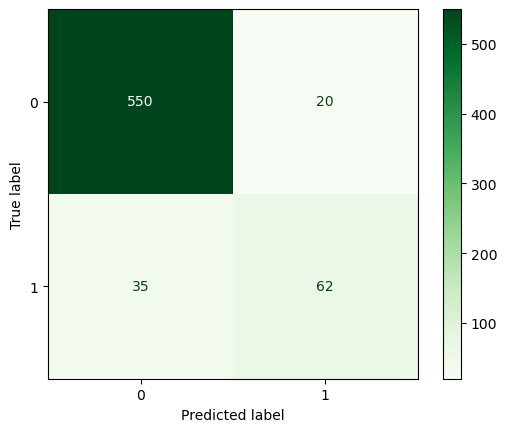

In [31]:
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Greens')

"The Decision Tree improved Recall from 25% to 64%, making it better for catching churners."

In [42]:
#Tuning the Grid Search CV
# Define the grid
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [1, 5, 10]}


In [43]:
# Setup the Search
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='recall')

In [44]:
# Run it on the training data
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 10}


In [45]:
# Save the best model
best_tree = grid.best_estimator_

In [46]:
# Get the importance numbers
importances = best_tree.feature_importances_
feature_names = X.columns


In [47]:
# Make a DataFrame
feat_importances = pd.Series(importances, index=feature_names)


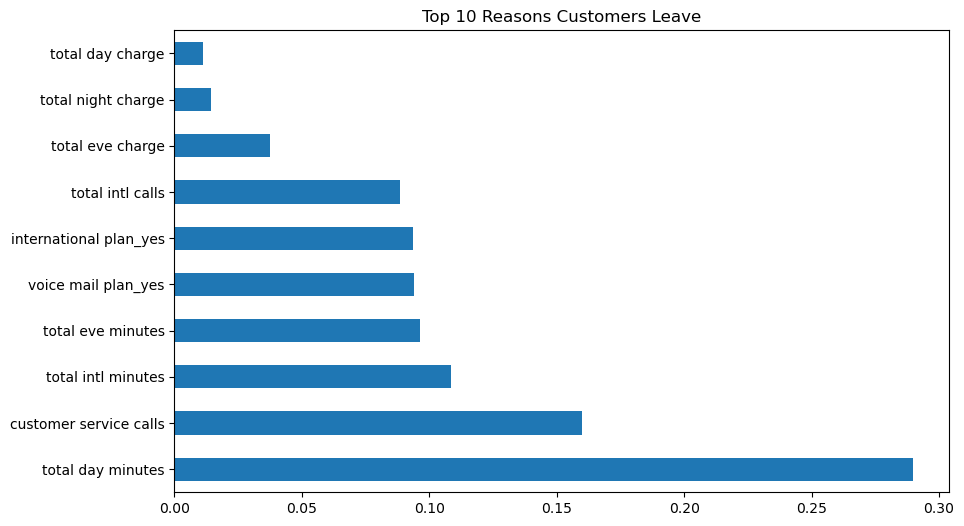

In [39]:
# Plot the Top 10
plt.figure(figsize=(10,6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Reasons Customers Leave")
plt.show()


In [41]:
top_features = feat_importances.sort_values(ascending=False).head(5)
print("THE WINNERS ARE:")
print(top_features)

THE WINNERS ARE:
total day minutes         0.289606
customer service calls    0.159857
total intl minutes        0.108468
total eve minutes         0.096405
voice mail plan_yes       0.093915
dtype: float64


In [49]:
#check whether higher day minutes correlate with churn
print(df.groupby('churn')['total day minutes'].mean())

churn
False    175.175754
True     206.914079
Name: total day minutes, dtype: float64


Conclution and Recommendations

We have seen that the feature that mostly influences or affects churn is the number of total day minutes. 
We have also seen that the people who have a higher total day minutes are more likely to churn.

RECOMMENDATION: I suggest that we come up with a cheaper day minute plan 
This is because as we have seen that those who have higher total day minutes churn more, it may be bacause they have found a cheaper deal elsewhere or they just find the charge too high.
